# Correlation and Autocorrelation in Time Series - Lab

## Introduction

In this lab, you'll practice your knowledge of correlation, autocorrelation, and partial autocorrelation by working on three different datasets. 

## Objectives

In this lab you will: 

- Plot and discuss the autocorrelation function (ACF) for a time series 
- Plot and discuss the partial autocorrelation function (PACF) for a time series 

## The Exchange Rate Data

We'll be looking at the exchange rates dataset again. 

- First, run the following cell to import all the libraries and the functions required for this lab 
- Then import the data in `'exch_rates.csv'` 
- Change the data type of the `'Frequency'` column 
- Set the `'Frequency'` column as the index of the DataFrame 

In [1]:
# Import all packages and functions
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams

In [3]:
# Import data
xr = pd.read_csv('exch_rates.csv')
xr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6905 entries, 0 to 6904
Data columns (total 4 columns):
Frequency            6905 non-null object
Euro                 4838 non-null float64
Australian Dollar    4838 non-null float64
Danish Krone         4838 non-null float64
dtypes: float64(3), object(1)
memory usage: 215.9+ KB


In [4]:

# Change the data type of the 'Frequency' column 
xr.Frequency = pd.to_datetime(xr.Frequency)

# Set the 'Frequency' column as the index
xr.set_index('Frequency', inplace=True)

xr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6905 entries, 2000-01-01 to 2018-11-26
Data columns (total 3 columns):
Euro                 4838 non-null float64
Australian Dollar    4838 non-null float64
Danish Krone         4838 non-null float64
dtypes: float64(3)
memory usage: 215.8 KB


In [5]:
xr.head()

,Euro,Australian Dollar,Danish Krone
Frequency,,,
2000-01-01,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN
2000-01-03,0.991080,1.520912,7.374034
2000-01-04,0.970403,1.521300,7.222610
2000-01-05,0.964506,1.521316,7.180170


Plot all three exchange rates in one graph: 

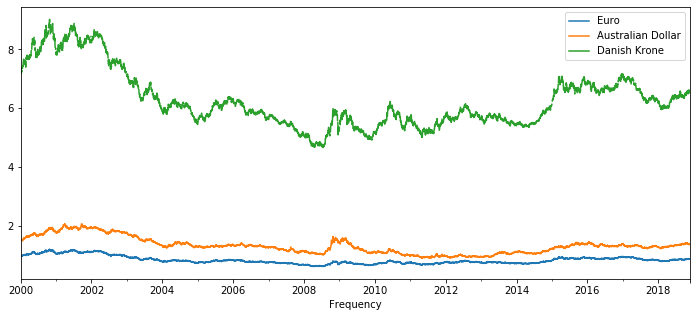

In [8]:
# Plot here
xr.plot(figsize=(12,5))
plt.show()

You can see that the EUR/USD and AUD/USD exchange rates are somewhere between 0.5 and 2, whereas the Danish Krone is somewhere between 4.5 and 9. Now let's look at the correlations between these time series. 

In [9]:
# Correlation
xr.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.883181,0.999952
Australian Dollar,0.883181,1.000000,0.882513
Danish Krone,0.999952,0.882513,1.000000


### What is your conclusion here? You might want to use outside resources to understand what's going on.

The Danish Krone is tied to the Euro.  The Australian dollar is not. 

Next, look at the plots of the differenced (1-lag) series. Use subplots to plot them rather than creating just one plot. 

In [14]:
# 1-lag differenced series 
xr_diff = xr.diff(periods=1)

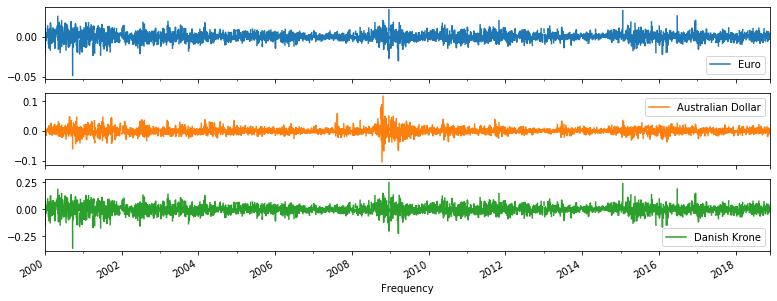

In [15]:
# Plot
xr_diff.plot(figsize = (13,5), subplots=True, legend=True);


Calculate the correlation of this differenced time series. 

In [16]:
# Correlation 
xr_diff.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.545369,0.999667
Australian Dollar,0.545369,1.000000,0.545133
Danish Krone,0.999667,0.545133,1.000000


### Explain what's going on

When we remove the seasonality, the Danish Crown and Euro remain pegged, as intended, but their true relationship with the Australian dollar becomes apparent. 

Next, let's look at the "lag-1 autocorrelation" for the EUR/USD exchange rate. 

- Create a "lag-1 autocorrelation" series 
- Combine both the original and the shifted ("lag-1 autocorrelation") series into a DataFrame 
- Plot these time series, and look at the correlation coefficient 

In [17]:
# Isolate the EUR/USD exchange rate
eur = xr[['Euro']]

# "Shift" the time series by one period
eur_shift_1 = eur.shift(periods=1)

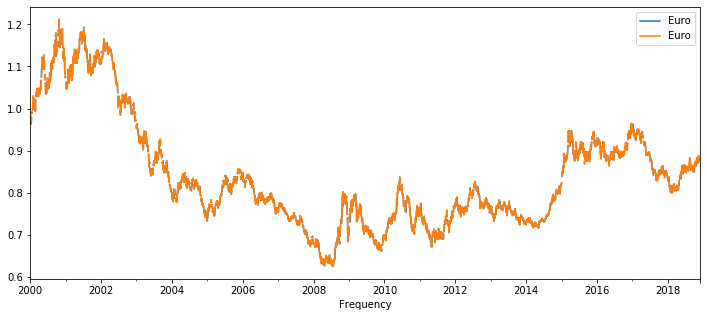

In [19]:
# Combine the original and shifted time series
lag_1 = pd.concat([eur_shift_1, eur], axis=1)

# Plot 
lag_1.plot(figsize=(12,5))
plt.show()

In [20]:
# Correlation
lag_1.corr()

,Euro,Euro
Euro,1.000000,0.999146
Euro,0.999146,1.000000


Repeat this for a "lag-50 autocorrelation". 

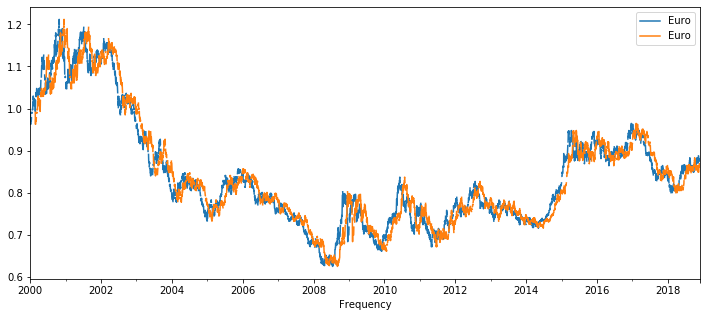

In [22]:
# "Shift" the time series by 50 periods
eur_shift_50 = eur.shift(periods=50)

# Combine the original and shifted time series
lag_50 = pd.concat([eur, eur_shift_50], axis=1)

# Plot
lag_50.plot(figsize=(12,5))
plt.show()

In [23]:
# Correlation
lag_50.corr()

,Euro,Euro
Euro,1.000000,0.968321
Euro,0.968321,1.000000


### What's your conclusion here?

In [ ]:
When we offset the rates by 50 days, they become less correlated. 

Knowing this, let's plot the ACF now.

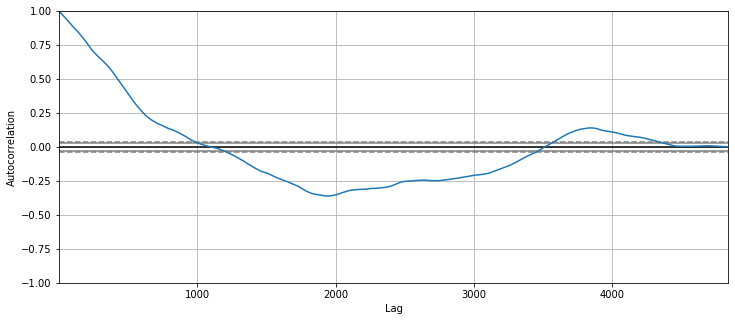

In [25]:
# Plot ACF
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(eur.dropna())
plt.show()

The series is heavily autocorrelated at first, and then there is a decay. This is a typical result for a series that is a random walk, generally you'll see heavy autocorrelations first, slowly tailing off until there is no autocorrelation anymore.

Next, let's look at the partial autocorrelation function plot.

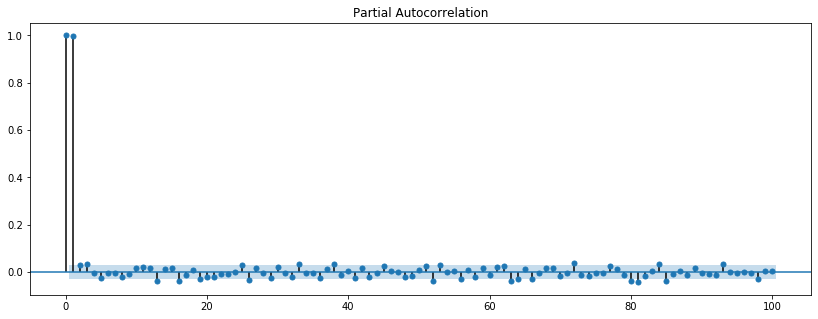

In [27]:
# Plot PACF
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 5
plot_pacf(eur.dropna(), lags=100);

This is interesting! Remember that *Partial Autocorrelation Function* gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags. When controlling for 1 period, the PACF is only very high for one-period lags, and basically 0 for shorter lags. This is again a typical result for random walk series!

## The Airpassenger Data

Let's work with the air passenger dataset you have seen before. Plot the ACF and PACF for both the differenced and regular series. 

> Note: When plotting the PACF, make sure you specify `method='ywm'` in order to avoid any warnings. 

In [28]:
# Import and process the air passenger data
air = pd.read_csv('passengers.csv')
air['Month'] = pd.to_datetime(air['Month'])
air.set_index('Month', inplace=True)
air.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


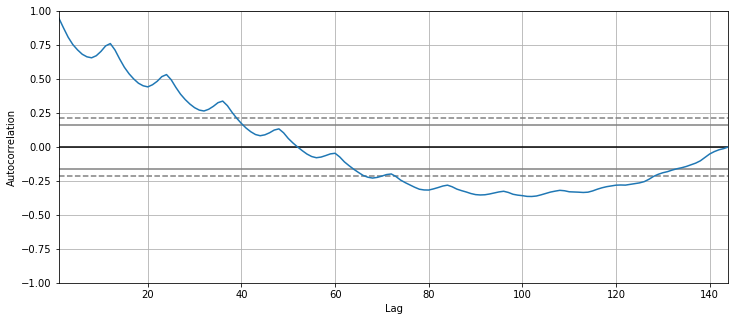

In [29]:
# Plot ACF (regular)
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(air)

/Users/joenelson/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


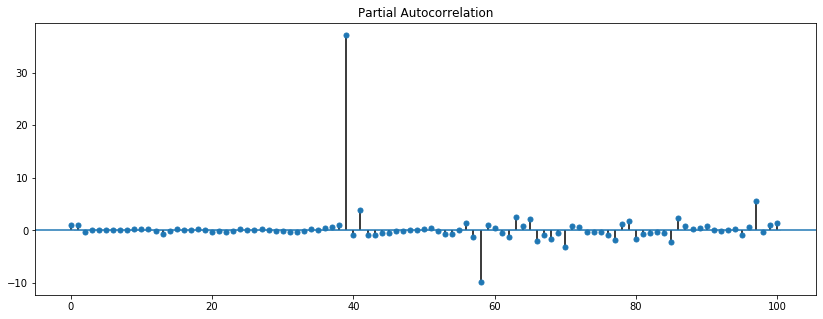

In [30]:
# Plot PACF (regular)
rcParams['figure.figsize'] = 14, 5
plot_pacf(air.dropna(), lags=100);

In [31]:
# Generate a differenced series
air_diff = air.diff(periods=1)

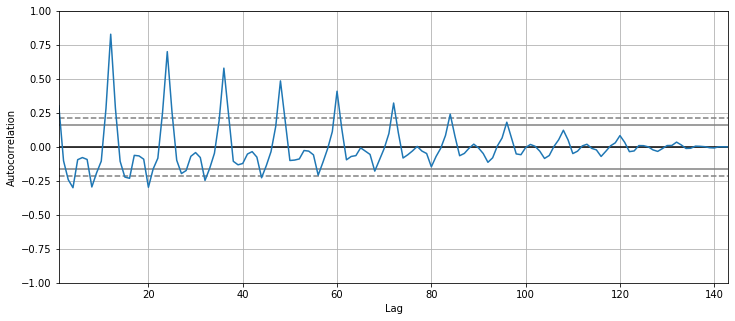

In [35]:
# Plot ACF (differenced)
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(air_diff.dropna())

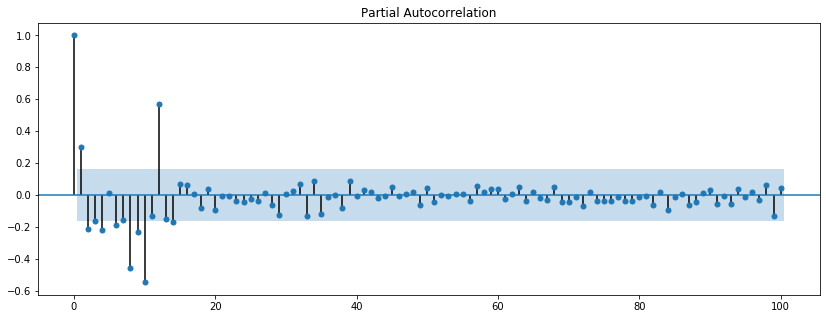

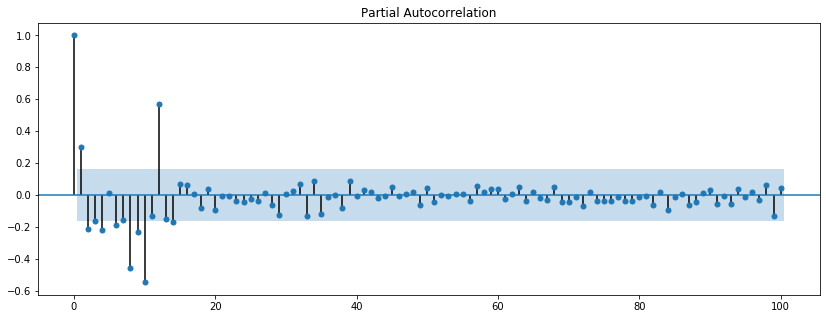

In [36]:
# Plot PACF (differenced)
rcParams['figure.figsize'] = 14, 5
plot_pacf(air_diff.dropna(), lags=100, method='ywm')

### Your conclusion here

## The NYSE data

Are you getting the hang of interpreting ACF and PACF plots? For one final time, plot the ACF and PACF for both the NYSE time series. 

> Note: When plotting the PACF, make sure you specify `method='ywm'` in order to avoid any warnings. 

In [38]:
# Import and process the NYSE data
nyse = pd.read_csv('NYSE_monthly.csv') 
nyse['Month'] = pd.to_datetime(nyse['Month'])
nyse.set_index('Month', inplace=True)
nyse.head()

,monthly_return
Month,
1961-01-01,0.082
1961-02-01,0.059
1961-03-01,0.050
1961-04-01,0.008
1961-05-01,0.042


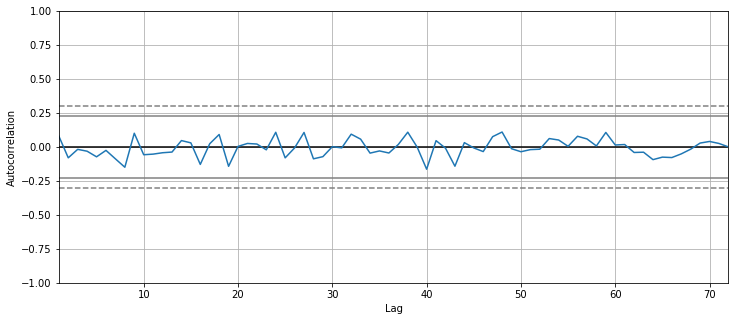

In [39]:
# Plot ACF
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(nyse)

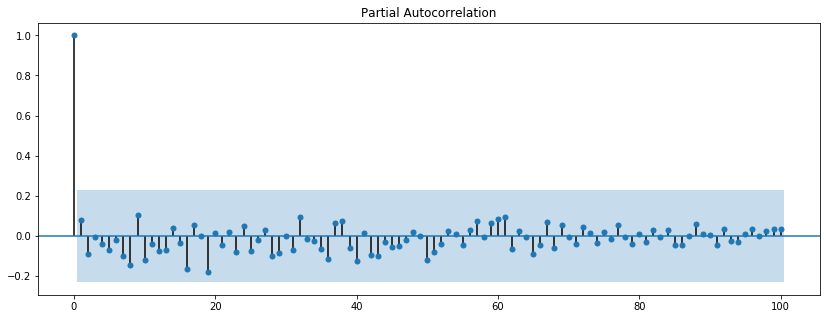

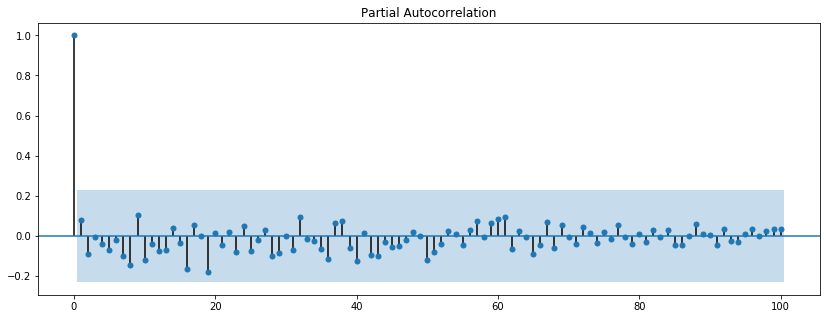

In [40]:
# Plot PACF
rcParams['figure.figsize'] = 14, 5
plot_pacf(nyse.dropna(), lags=100, method='ywm')

## Your conclusion here

In [ ]:
no real correlation at all. 



## Summary

Great, you've now been introduced to ACF and PACF. Let's move into more serious modeling with autoregressive and moving average models!